In [11]:
from numpy import array, dot, random
from random import choice
from matplotlib import pyplot as plt
import numpy as np

In [22]:

# Your goal is to complete this function by writing the necessary functions
#Input parameters
#   X: training data matrix. Here, X is an mxn matrix (a 2D numpy array), 
#   where each row represents a trining example and each column represents a feature. 
#   Y: expected output for the training data. In our examples, Y is an mx1 vector
#   eta: learning rate
#   epochs: number of iterations
def InitWeight(X):
    m=X.shape[1]
    #print('The value of m is ='+ str(m))
    return np.random.rand(m)

def WeightedSUM(w,x):
    sum=0
    for a,b in zip(w,x):
        sum+=a*b
    return sum

def UnitStep(w_sum):
    if(w_sum>=0):
        return 1
    else:
        return 0
    
def ComputeError(y,y_pred):
    return (y-y_pred)


def UpdateWeight(w,eta,error,x):
    y=[]
    #print('Weighted array before update- ')
    #print(w)
    #new_value=0
    for i in range (0, len(w)):
        new_value=w[i]+eta*error*x[i]
        #print('The new value is- '+str(new_value))
        y.append(new_value)
    #print('The updated weights array is-')
    #print(y)
    return y
def ComputeAccuracy(X,Y,w):
    positives=0
    negatives=0
    for x,y in zip(X,Y):
        w_sum=WeightedSUM(w,x)
        y_pred=UnitStep(w_sum)
        error=ComputeError(y,y_pred)
        if(error==0):
            positives+=1
        else:
            negatives+=1
    accuracy_quotient=positives/(positives+negatives)
    #print(accuracy_quotient)
    return accuracy_quotient

def PlotAccuracy(accuracy):
    x = np.linspace(0, len(accuracy),len(accuracy))
    #fig = plt.figure()
    plt.title("Accuracy plot")
    plt.plot(x, accuracy)
    plt.ylabel("Accuracy")
    plt.show()
    
def perceptron_training(X,Y, eta, epochs):
    
    #Task 1: randomly initialize the weights 
    # what is the shape of the weight array w? Get this information from X 
    w = InitWeight(X) # write this InitWeight function
    #print('The initial weight array is- ')
    #print(w)
    accuracy = []
    # Run iterations
    epoch=0
    for i in range(epochs):
        # in eveery iteration train for every training examples
        epoch+=1
        #print("Iteration- "+str(epoch))
        c=0
        for x, y in zip(X, Y):
            c+=1
            #print('Input '+str(c)+"-")
            #print(x)
            #print('The expected output value of input '+str(c)+" is-"+str(y))
            
            # Task 2: Compute weighted sum based on w and x
            w_sum = WeightedSUM(w,x) # write this WeightedSUM function
            #print('The weighted sum is- '+str(w_sum))
            # Task 3: Use a step function to get the predicted output 
            y_pred = UnitStep(w_sum) # write this UnitStep function
            #print('The predicted output is- '+str(y_pred))
            # Task 3: Compute error (predicted-expected output)
            error = ComputeError(y,y_pred) # write this ComputeError function
            #print("Error- "+str(error))
            # Task 4: update weights
            w = UpdateWeight(w,eta,error,x) # write this UpdateWeight function
            
           
        
        # Task 5: Compute accuracy of your current model
        # The accuracy computation is similar to the above operation (except that you don't update weights)
        # The accuracy should be normalized (0<= accuracy <= 1)
        acc = ComputeAccuracy(X,Y,w) # write this ComputeAccuracy function (you can use WeightedSUM and UnitStep functions)
        accuracy.append (acc)
     
    # Task 6: plot accuracy
    PlotAccuracy(accuracy) # # write this functions
    

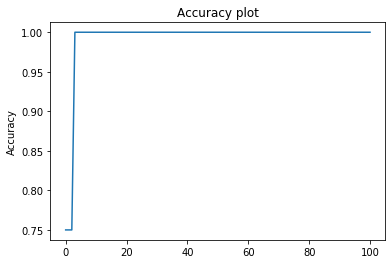

In [23]:
# Testing your code:
# learn the binary OR function
# we added an extra 1 to remove bias
# you can try removing the eextra 1 to see how the accuracy is affected
OR_X = np.array([[0,0,1], [0,1,1],[1,0,1],[1,1,1]])
OR_Y = np.array([0,1,1,1])
#print(OR_X.shape)
perceptron_training(OR_X,OR_Y, .2, 100)



Shape of X: (569, 30)
Shape of Y: (569,)


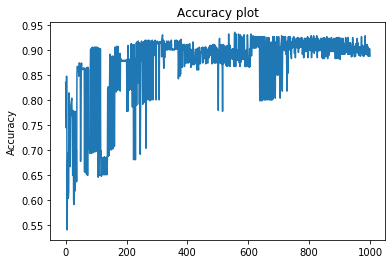

In [24]:
# Testing your code with real data:
# You may have to install sklearn

import sklearn.datasets
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target
#X.shape.
print ("Shape of X:", X.shape)
print ("Shape of Y:", Y.shape)
#print(X)
#print(Y)
perceptron_training(X,Y, .2, 1000)

